In [1]:
import pandas as pd

In [3]:
ebola = pd.read_csv('country_timeseries.csv')

In [5]:
#결측치 여부 확인
ebola.isnull()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
1,False,False,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
2,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
3,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True
4,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
118,False,False,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
119,False,False,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
120,False,False,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True


In [4]:
#컬럼별 결측치 개수 확인
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [6]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [10]:
!pip install missingno

In [11]:
#결측치를 직관적으로 파악할 수 있도록 도와주는 패키지
import missingno as msno

<AxesSubplot:>

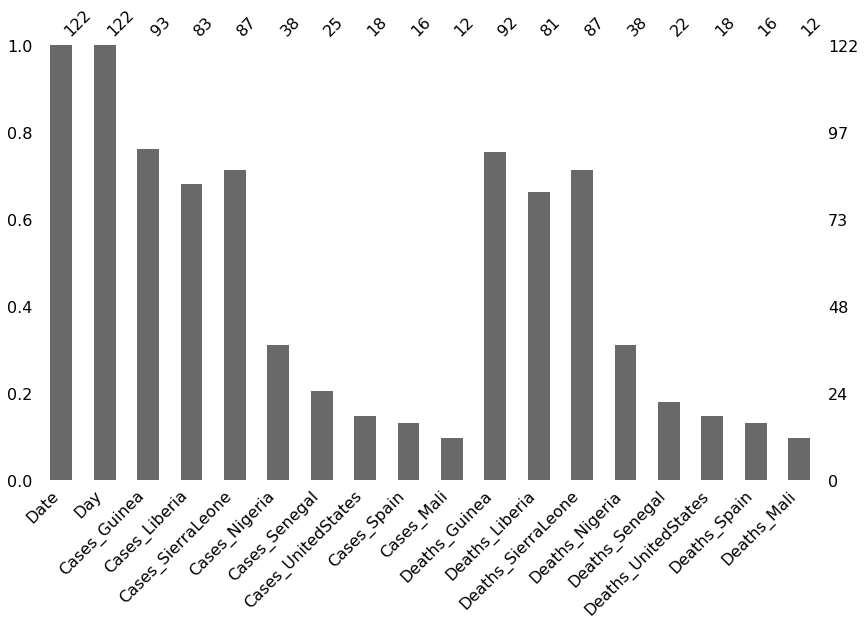

In [12]:
#결측치 비중 표현
msno.bar(df = ebola, figsize=(14,8))

<AxesSubplot:>

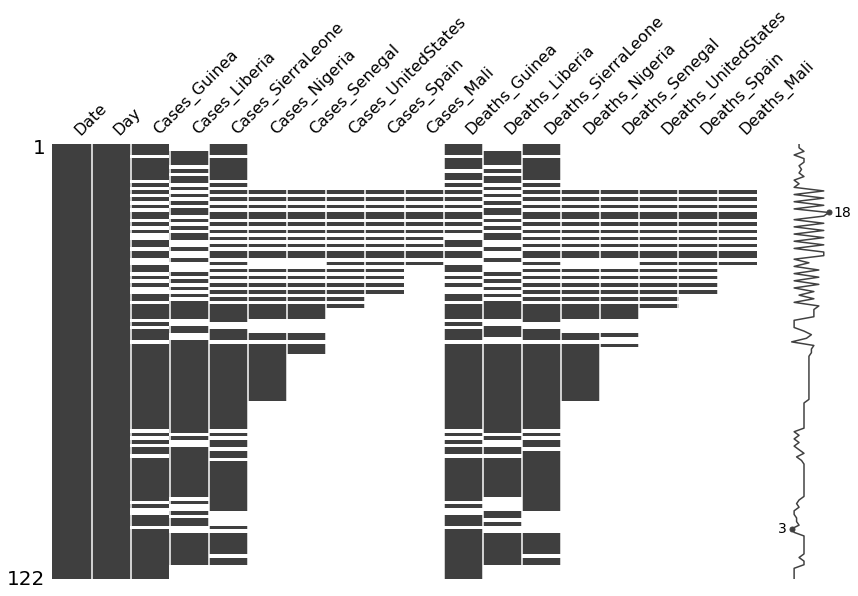

In [13]:
#흰색 부분이 결측치
msno.matrix(df = ebola, figsize=(14, 8))

In [14]:
ebola.iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [15]:
#raw data 그대로 평균(결측치는 아예 계산에서 제외)
ebola.iloc[0:10, 0:5]['Cases_Liberia'].mean()

8049.166666666667

In [17]:
#0으로 결측치 대체하고 평균(분모에 결측치까지 포함)
ebola.fillna(0).iloc[0:10, 0:5]['Cases_Liberia'].mean()

4829.5

- 하지만 0은 값의 왜곡이 너무 커짐

### 다른 방법으로 누락값 대체하는 방법
- fillna(method = '')형식
- ffill - 결측치 이전 값으로 변경, bfill - 결측치 이후 값으로 변경

In [18]:
ff = ebola.fillna(method='ffill').iloc[0:10, 0:5]['Cases_Liberia']

In [20]:
print(ff)
print(ff.mean())

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    8018.0
7    7977.0
8    7977.0
9    7862.0
Name: Cases_Liberia, dtype: float64
8036.25


In [21]:
bb = ebola.fillna(method='bfill').iloc[0:10, 0:5]['Cases_Liberia']

In [22]:
print(bb)
print(bb.mean())

0    8166.0
1    8166.0
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    7977.0
7    7977.0
8    7862.0
9    7862.0
Name: Cases_Liberia, dtype: float64
8046.6


In [23]:
#평균으로 대체
mean = ebola.iloc[0:10, 0:5]['Cases_Liberia'].mean()
ebola.fillna(mean).iloc[0:10, 0:5]['Cases_Liberia'].mean()

8049.166666666667

#### 보간법 이용

<AxesSubplot:>

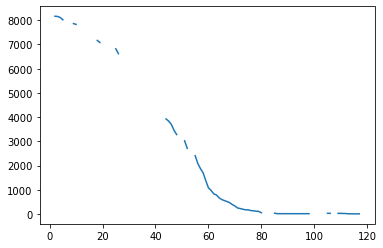

In [24]:
ebola['Cases_Liberia'].plot()

<AxesSubplot:>

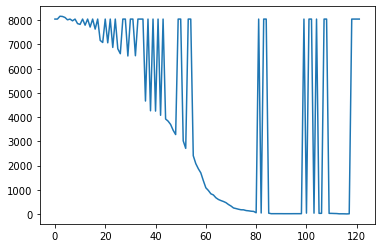

In [26]:
#평균으로 대체하고 플롯
ebola.fillna(mean)['Cases_Liberia'].plot()

<AxesSubplot:>

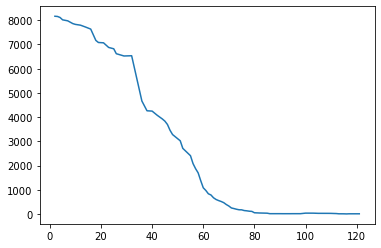

In [27]:
ebola.interpolate(method='linear')['Cases_Liberia'].plot()

<AxesSubplot:>

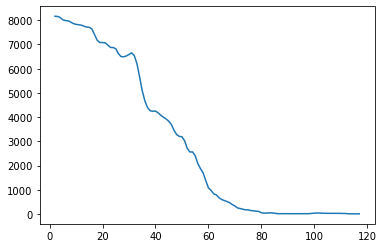

In [28]:
ebola.interpolate(method='quadratic')['Cases_Liberia'].plot()

### 열과 피벗
- id_vars: 위치를 유지할 (기준으로 삼을) 열 지정
- value_vars: 행으로 변경할 열 지정
- var_name: 행으로 바뀌면서 새로 만들어지는 컬럼의 이름 지정
- value_name: 행으로 바뀌는 열의 원래 데이터 값 컬럼 이름 지정

In [30]:
pew = pd.read_csv('pew.csv')

In [32]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [33]:
#원래 행 18개인데 컬럼 10개가 melt 되면서 행 180개가 됨
#컬럼의 개수는 기준 열, melt되는 열, melt 되는 열의 원래 값 - 3개
pd.melt(pew, id_vars = 'religion').head(20)

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [34]:
pd.melt(pew, id_vars = 'religion', var_name='income',value_name='count')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [37]:
bill = pd.read_csv('billboard.csv')

In [38]:
bill.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
pd.melt(bill, id_vars=['year','artist','track','time','date.entered'], var_name = 'week', value_name ='rating')
#기준으로 삼을 열 여러개 지정해도 됨

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [43]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
ebola_sp1= pd.melt(ebola, id_vars=['Date','Day'])

In [45]:
ebola_sp1

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [46]:
variable_sp1 = ebola_sp1.variable.str.split('_')
#_기준으로 단어 분리

In [47]:
variable_sp1

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [48]:
case = variable_sp1.str.get(0)

In [49]:
case

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [50]:
case_values = variable_sp1.str.get(1)

In [51]:
case_values

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [52]:
ebola_sp1['case_vr']= case
ebola_sp1['values_vr']= case_values

In [53]:
ebola_sp1

,Date,Day,variable,value,case_vr,values_vr
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali
